In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

In [4]:
## Publication date trends
df['publication_date'] = pd.to_datetime(df['date'])
df['publication_day'] = df['publication_date'].dt.day_name()
publication_trends = df.groupby('publication_day').size()

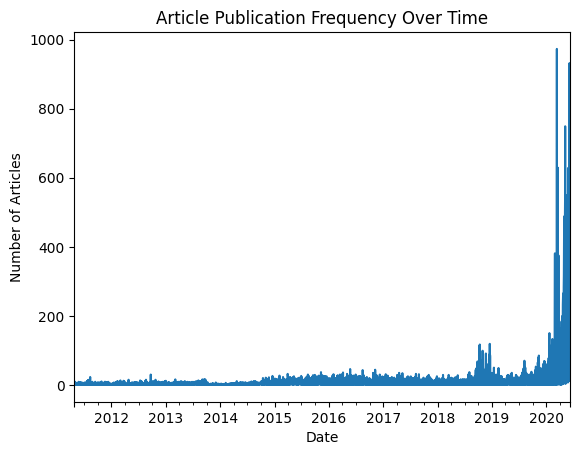

In [5]:
# Time Series Analysis
## Publication frequency over time
df['publication_date'] = pd.to_datetime(df['publication_date'])
df['publication_time'] = df['publication_date'].dt.time
df.set_index('publication_date').resample('D').size().plot()
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [6]:
# Publisher Analysis
## Most active publishers
articles_per_publisher = df['publisher'].value_counts()
print("Most Active Publishers:")
print(articles_per_publisher.head())

Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


In [7]:
## Analysis of publishing times by publishers

publisher_time_analysis = df.groupby('publisher')['publication_time'].value_counts()
print("Analysis of Publishing Times by Publishers:")
print(publisher_time_analysis)

Analysis of Publishing Times by Publishers:
publisher                  publication_time
AARP                       11:54:21            2
                           12:08:29            1
Aaron Jackson.Ed           11:23:35            1
Aaron Levitt               15:53:06            3
                           14:06:14            2
                                              ..
vishwanath@benzinga.com    14:26:36            1
vivek.proactive@gmail.com  09:19:59            1
                           09:46:20            1
                           11:44:36            1
webmaster                  09:06:54            1
Name: count, Length: 33305, dtype: int64
